In [1]:
import pandas as pd
import numpy as np

In [29]:
import matplotlib.pyplot as plt
import statsmodels.graphics.mosaicplot as msc
import pandas as pd
import seaborn as sb
import numpy as np
plt.rcParams["font.family"] = 'BM YEONSUNG'
#plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["axes.unicode_minus"] = False

In [9]:
D=pd.read_excel('https://data.hossam.kr/D01/mpg.xlsx')
data=pd.DataFrame(D)

In [10]:
data["ch_y"]=data[['cty','hwy']].mean(axis=1)

In [16]:
temp=data["ch_y"].mean(axis=0) #기준

In [24]:
temp

20.14957264957265

In [17]:
data["평가"]=np.where((data['ch_y']>=temp),"Pass","Fail")

In [25]:
conditoin=[
    (data["ch_y"]/temp>=0.9),
    (data["ch_y"]/temp>=0.8),
    (data["ch_y"]/temp>=0.7)
]
result=["A","B","C"]

In [26]:
data["등급"]=np.select(conditoin,result,default="D")

In [75]:
plt.rcParams["figure.figsize"] = (20, 10)

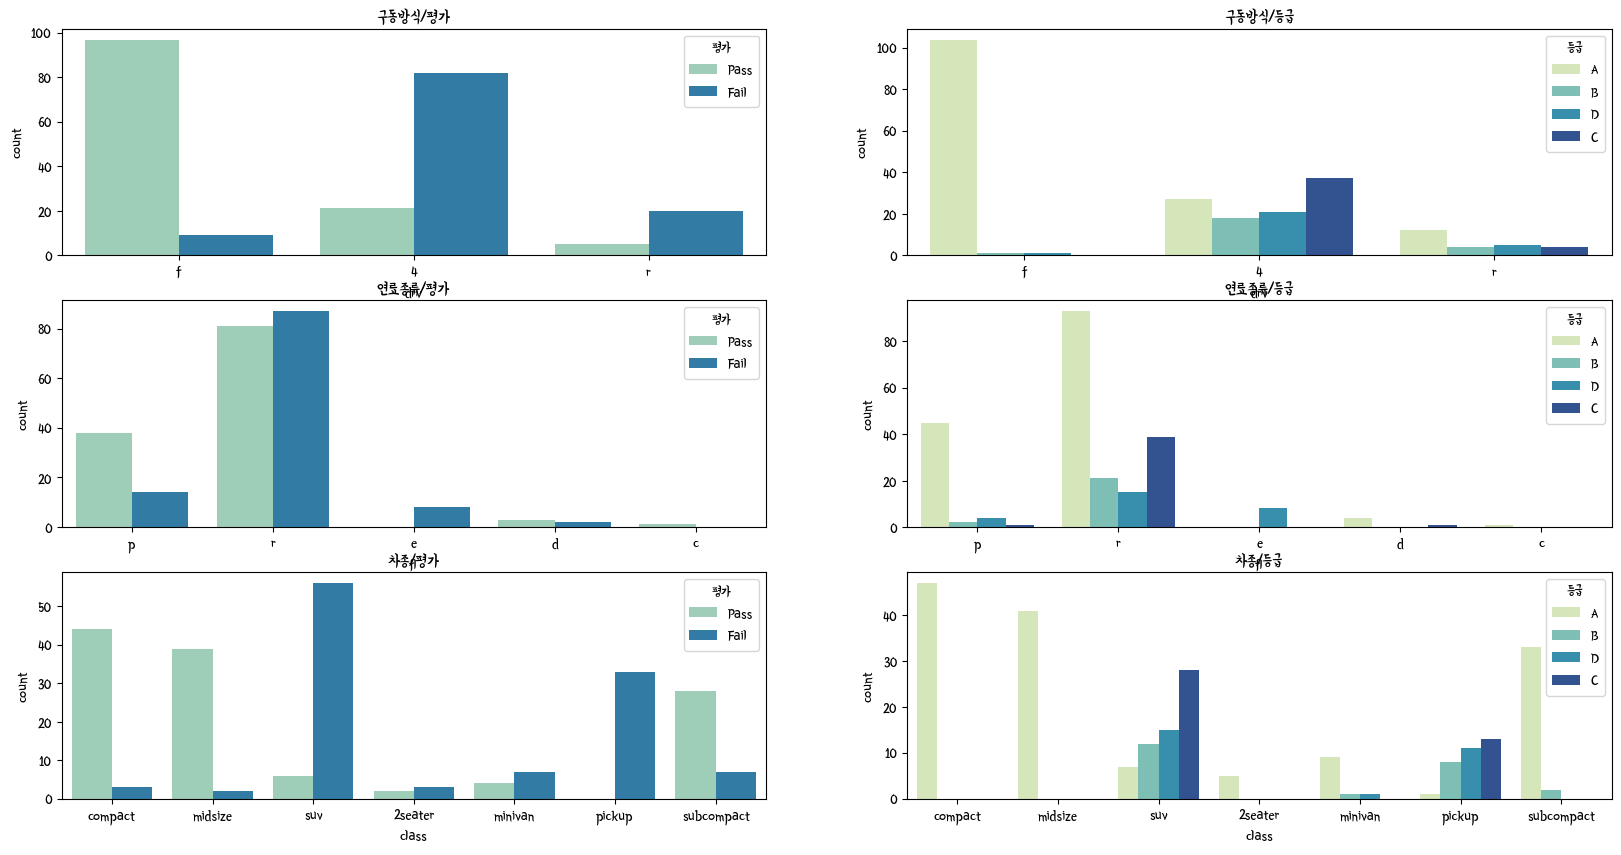

In [78]:
fig,AX=plt.subplots(3,2)
Xs=["drv","fl","class"]
DT=dict(zip(Xs,AX))

for x in DT:
    sb.countplot(
    ax=DT[x][0],
    data=data,
    x=x,
    hue="평가",
    palette='YlGnBu')

    sb.countplot(
    ax=DT[x][1],
    data=data,
    x=x,
    hue="등급",
    palette='YlGnBu')
#꾸미기#
name=dict(zip(Xs,["구동방식","연료종류","차종"]))
name2=["평가","등급"]
for y in name:
    for i in range(len(name2)):
        DT[y][i].title.set_text(f"{name[y]}/{name2[i]}")
        # DT[y][i].set_xticks(None)


plt.show()
plt.close()